<a href="https://colab.research.google.com/github/sasumwen/medical-cost/blob/main/medical_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# one hot encoding the categorical features

insurance_one_hoted = pd.get_dummies(insurance)
insurance_one_hoted

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [5]:
# create features and labels

X = insurance_one_hoted.drop('charges', axis =1)
y = insurance_one_hoted["charges"]

X.head(), y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [6]:
# create train and test set
tf.random.set_seed(84)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [7]:
# Building the model
tf.random.set_seed(84)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# compile
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"]
                        )

# fit
insurance_model.fit(tf.expand_dims(X_train, -1), y_train, epochs = 500)


Epoch 1/500
34/34 [==============================] - 1s 3ms/step - loss: 12708.0576 - mae: 12708.0576
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 10578.9521 - mae: 10578.9521
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 8652.3838 - mae: 8652.3838
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 8342.7832 - mae: 8342.7832
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 8493.1982 - mae: 8493.1982
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 8414.8330 - mae: 8414.8330
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 8404.6670 - mae: 8404.6670
Epoch 8/500
34/34 [==============================] - 0s 4ms/step - loss: 8445.7207 - mae: 8445.7207
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 8369.4805 - mae: 8369.4805
Epoch 10/500
34/34 [==============================] - 0s 4ms/step - loss: 8507.7988 - mae: 8507.

In [8]:
# check the result of the insurance on the test data by evaluating

insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8668.4434 - mae: 8668.4434


[8668.443359375, 8668.443359375]

Being wrong by over 8000 shows the model isn't performing well., lets try improvement

In [9]:
tf.random.set_seed
callback= tf.keras.callbacks.EarlyStopping(monitor = "mae", patience = 3)

insurance_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(570),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(57),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

insurance_model2.compile(loss=tf.keras.losses.mae,
                         optimizer= tf.keras.optimizers.Adam(),
                         metrics =['mae'])



ins = insurance_model2.fit(tf.expand_dims(X_train, -1), y_train, callbacks = [callback], epochs =200)

Epoch 1/200
34/34 [==============================] - 1s 7ms/step - loss: 13022.4863 - mae: 13022.4863
Epoch 2/200
34/34 [==============================] - 0s 7ms/step - loss: 12161.7168 - mae: 12161.7168
Epoch 3/200
34/34 [==============================] - 0s 7ms/step - loss: 12056.4795 - mae: 12056.4795
Epoch 4/200
34/34 [==============================] - 0s 7ms/step - loss: 11908.8994 - mae: 11908.8994
Epoch 5/200
34/34 [==============================] - 0s 7ms/step - loss: 11196.8184 - mae: 11196.8184
Epoch 6/200
34/34 [==============================] - 0s 7ms/step - loss: 8717.5439 - mae: 8717.5439
Epoch 7/200
34/34 [==============================] - 0s 7ms/step - loss: 8356.3975 - mae: 8356.3975
Epoch 8/200
34/34 [==============================] - 0s 7ms/step - loss: 8371.4141 - mae: 8371.4141
Epoch 9/200
34/34 [==============================] - 0s 7ms/step - loss: 8359.6729 - mae: 8359.6729
Epoch 10/200
34/34 [==============================] - 0s 6ms/step - loss: 8341.8350 - mae:

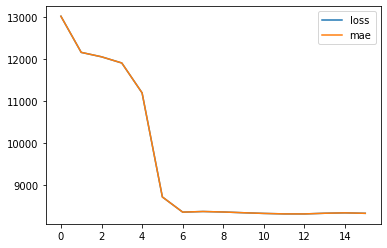

In [10]:

pd.DataFrame(ins.history).plot()

In [11]:
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Scaling and Normalization

In [12]:
import sklearn

In [13]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

# create features and labels
X = insurance.drop('charges', axis =1)
y = insurance["charges"]

# create test and train set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=84)

# fit the column transformer to training data
ct.fit(X_train)

# tranform the train and test with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [14]:
X_train_normal[0]

array([0.5      , 0.5759148, 0.4      , 0.       , 1.       , 1.       ,
       0.       , 0.       , 1.       , 0.       , 0.       ])